# Cleaning Lockdown Data
In this notebook we will clean the data collected through the   Coronavirus Government Response Tracker API, maintained by Oxford University. We will drop all the unnecesary info like the missing columns MLT, SVN and HVN. the result will be exported as csv file.



In [141]:
# First import necessary libraries
import requests
import json
import os

import pandas as pd

In [142]:
pd.read_csv(os.path.join("..", '01.raw_data',"stringency.csv"))

,Unnamed: 0,country,date,stringency
0,0,NLD,2020-01-01,0.00
1,1,ROU,2020-01-01,0.00
2,2,SWE,2020-01-01,0.00
3,3,AUT,2020-01-01,0.00
4,4,BEL,2020-01-01,0.00
...,...,...,...,...
6426,6426,IRL,2020-08-26,70.83
6427,6427,ITA,2020-08-26,50.93
6428,6428,LTU,2020-08-26,19.44
6429,6429,LVA,2020-08-26,43.52


In [143]:
df=pd.DataFrame(pd.read_csv(os.path.join("..", '01.raw_data',"stringency.csv")))

In [144]:
df.columns

Index(['Unnamed: 0', 'country', 'date', 'stringency'], dtype='object')

We can clearly drop the column 'Unnamed: 0'

In [145]:
df=df.drop(['Unnamed: 0'], axis=1)

Now we sort by country and date to get the information in our desired format

In [147]:
df.sort_values(by=['country','date']).iloc[0:10]

,country,date,stringency
3,AUT,2020-01-01,0.0
37,AUT,2020-01-02,0.0
57,AUT,2020-01-03,0.0
91,AUT,2020-01-04,0.0
111,AUT,2020-01-05,0.0
145,AUT,2020-01-06,0.0
165,AUT,2020-01-07,0.0
199,AUT,2020-01-08,0.0
219,AUT,2020-01-09,0.0
253,AUT,2020-01-10,0.0


In [20]:
df.sort_values(by=['date']).iloc[0:27]

,country,date,stringency
0,NLD,2020-01-01,0.0
26,LUX,2020-01-01,0.0
25,LTU,2020-01-01,0.0
24,ITA,2020-01-01,0.0
23,IRL,2020-01-01,0.0
22,HRV,2020-01-01,0.0
21,GRC,2020-01-01,0.0
20,GBR,2020-01-01,0.0
18,SVN,2020-01-01,0.0
17,SVK,2020-01-01,0.0


In [112]:
table = pd.pivot_table(df, values='stringency', index=['date'],

                    columns=['country'])#, aggfunc=np.sum)

In [113]:
table

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2020-01-02,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2020-01-03,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2020-01-04,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2020-01-05,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-22,31.48,56.48,30.56,50.0,36.11,56.94,56.48,62.5,19.44,37.96,...,19.44,30.56,43.52,45.37,39.81,66.2,45.37,32.41,43.52,37.04
2020-08-23,31.48,56.48,30.56,50.0,36.11,56.94,56.48,62.5,19.44,37.96,...,19.44,30.56,43.52,45.37,39.81,66.2,45.37,32.41,43.52,37.04
2020-08-24,31.48,56.48,30.56,50.0,36.11,59.72,56.48,62.5,19.44,37.96,...,19.44,30.56,43.52,45.37,39.81,66.2,45.37,32.41,43.52,37.04


In [121]:
table.columns

Index(['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA',
       'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE'],
      dtype='object', name='country')

In [127]:
table.drop(columns=[ 'SVN', 'HRV'])
#l=l.drop(['MLT', 'SVN', 'HRV'], axis=1)

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,ITA,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2020-01-02,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2020-01-03,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2020-01-04,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2020-01-05,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-22,31.48,56.48,30.56,50.0,36.11,56.94,56.48,62.5,19.44,37.96,...,50.93,19.44,30.56,43.52,45.37,39.81,66.2,45.37,32.41,37.04
2020-08-23,31.48,56.48,30.56,50.0,36.11,56.94,56.48,62.5,19.44,37.96,...,50.93,19.44,30.56,43.52,45.37,39.81,66.2,45.37,32.41,37.04
2020-08-24,31.48,56.48,30.56,50.0,36.11,59.72,56.48,62.5,19.44,37.96,...,50.93,19.44,30.56,43.52,45.37,39.81,66.2,45.37,32.41,37.04


In [128]:
table['mean'] = table.mean(axis=1)

In [129]:
table

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE,mean
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
2020-01-02,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
2020-01-03,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
2020-01-04,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
2020-01-05,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-22,31.48,56.48,30.56,50.0,36.11,56.94,56.48,62.5,19.44,37.96,...,30.56,43.52,45.37,39.81,66.2,45.37,32.41,43.52,37.04,44.718148
2020-08-23,31.48,56.48,30.56,50.0,36.11,56.94,56.48,62.5,19.44,37.96,...,30.56,43.52,45.37,39.81,66.2,45.37,32.41,43.52,37.04,44.718148
2020-08-24,31.48,56.48,30.56,50.0,36.11,59.72,56.48,62.5,19.44,37.96,...,30.56,43.52,45.37,39.81,66.2,45.37,32.41,43.52,37.04,44.821111


In [123]:
j=pd.pivot_table(data=df, index='date', values='stringency', columns='country',aggfunc='mean').reset_index().round(1)

In [154]:
j=df.sort_values(by=['country','date'])

In [125]:
j

country,date,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-08-22,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0
235,2020-08-23,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0
236,2020-08-24,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0
237,2020-08-25,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0


In [38]:
df['Datetime'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [40]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [41]:
df

,country,date,stringency,Datetime
0,NLD,2020-01-01,0.00,2020-01-01
1,ROU,2020-01-01,0.00,2020-01-01
2,SWE,2020-01-01,0.00,2020-01-01
3,AUT,2020-01-01,0.00,2020-01-01
4,BEL,2020-01-01,0.00,2020-01-01
...,...,...,...,...
6426,IRL,2020-08-26,70.83,2020-08-26
6427,ITA,2020-08-26,50.93,2020-08-26
6428,LTU,2020-08-26,19.44,2020-08-26
6429,LVA,2020-08-26,43.52,2020-08-26


In [44]:
j['week']=j['date'].dt.strftime('%W')

In [45]:
j.groupby('week').mean().round(1)

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE
week,,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.0
04,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,0.0
05,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0
06,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0
07,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0
08,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,0.0


In [46]:
l=j.groupby('week').mean().round(1)
l

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE
week,,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.0
04,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,0.0
05,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0
06,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0
07,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0
08,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,0.0


In [71]:
l['weeks'] =date_list[::-1]

In [72]:
l

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE,weeks
week,,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-30
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-06
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-13
03,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.0,2020-01-20
04,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,0.0,2020-01-27
05,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0,2020-02-03
06,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0,2020-02-10
07,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,0.0,2020-02-17
08,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,0.0,2020-02-24


In [73]:
l.groupby('weeks')

<Figure size 432x288 with 0 Axes>

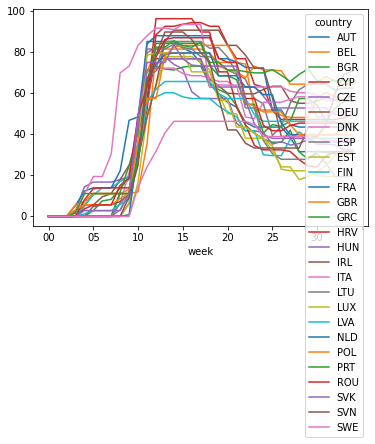

In [101]:
import matplotlib.pyplot as plt
f= plt.figure()


l.plot()

In [136]:
l=l.set_index('weeks')

In [138]:
l['mean'] = l.mean(axis=1)

In [139]:
l

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean
weeks,,,,,,,,,,,,,,,,,,,,,
2019-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2020-01-20,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.880
2020-01-27,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,3.680
2020-02-03,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.388
2020-02-10,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.908
2020-02-17,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,6.440
2020-02-24,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,11.272


In [140]:
l.to_pickle('lockdown_clean.pkl')

In [70]:
import datetime

base = datetime.datetime(2020, 8, 24)
date_list = [(base - datetime.timedelta(days=x)*7).strftime("%Y-%m-%d") for x in range(0, 35)]
#date_2=date_list.reverse()
date_list[::-1]

['2019-12-30',
 '2020-01-06',
 '2020-01-13',
 '2020-01-20',
 '2020-01-27',
 '2020-02-03',
 '2020-02-10',
 '2020-02-17',
 '2020-02-24',
 '2020-03-02',
 '2020-03-09',
 '2020-03-16',
 '2020-03-23',
 '2020-03-30',
 '2020-04-06',
 '2020-04-13',
 '2020-04-20',
 '2020-04-27',
 '2020-05-04',
 '2020-05-11',
 '2020-05-18',
 '2020-05-25',
 '2020-06-01',
 '2020-06-08',
 '2020-06-15',
 '2020-06-22',
 '2020-06-29',
 '2020-07-06',
 '2020-07-13',
 '2020-07-20',
 '2020-07-27',
 '2020-08-03',
 '2020-08-10',
 '2020-08-17',
 '2020-08-24']

In [54]:
print(date_list)

['2020-08-24', '2020-08-17', '2020-08-10', '2020-08-03', '2020-07-27', '2020-07-20', '2020-07-13', '2020-07-06', '2020-06-29', '2020-06-22', '2020-06-15', '2020-06-08', '2020-06-01', '2020-05-25', '2020-05-18', '2020-05-11', '2020-05-04', '2020-04-27', '2020-04-20', '2020-04-13', '2020-04-06', '2020-03-30', '2020-03-23', '2020-03-16', '2020-03-09', '2020-03-02', '2020-02-24', '2020-02-17', '2020-02-10', '2020-02-03', '2020-01-27', '2020-01-20', '2020-01-13', '2020-01-06']


In [55]:
# Create a list of dates
weeks_date=[]

for i in range(len(date_list)-1):
    x=f"{date_list[i+1]}--{date_list[i]}"
    weeks_date.append(x)
weeks_date

['2020-08-17--2020-08-24',
 '2020-08-10--2020-08-17',
 '2020-08-03--2020-08-10',
 '2020-07-27--2020-08-03',
 '2020-07-20--2020-07-27',
 '2020-07-13--2020-07-20',
 '2020-07-06--2020-07-13',
 '2020-06-29--2020-07-06',
 '2020-06-22--2020-06-29',
 '2020-06-15--2020-06-22',
 '2020-06-08--2020-06-15',
 '2020-06-01--2020-06-08',
 '2020-05-25--2020-06-01',
 '2020-05-18--2020-05-25',
 '2020-05-11--2020-05-18',
 '2020-05-04--2020-05-11',
 '2020-04-27--2020-05-04',
 '2020-04-20--2020-04-27',
 '2020-04-13--2020-04-20',
 '2020-04-06--2020-04-13',
 '2020-03-30--2020-04-06',
 '2020-03-23--2020-03-30',
 '2020-03-16--2020-03-23',
 '2020-03-09--2020-03-16',
 '2020-03-02--2020-03-09',
 '2020-02-24--2020-03-02',
 '2020-02-17--2020-02-24',
 '2020-02-10--2020-02-17',
 '2020-02-03--2020-02-10',
 '2020-01-27--2020-02-03',
 '2020-01-20--2020-01-27',
 '2020-01-13--2020-01-20',
 '2020-01-06--2020-01-13']

In [76]:
#table = pd.pivot_table(df, values='stringency', index=['country'],

                   # columns=['date'])#, aggfunc=np.sum)#

In [77]:
#table.columns = pd.to_datetime(table.columns)


In [78]:
#table.resample('w-Mon', axis=1)

In [140]:
#pd.datetime(table.columns[0]) #.dt.strftime('%W' ,axis=1)

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26
country,,,,,,,,,,,,,,,,,,,,,
AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.48,NaN,NaN,NaN,31.48,31.48,31.48,31.48,31.48,31.48
BEL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.48,56.48,56.48,56.48,56.48,56.48,56.48,56.48,56.48,56.48
BGR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.56,30.56,30.56,30.56,30.56,30.56,30.56,30.56,30.56,30.56
CYP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.22,47.22,47.22,47.22,47.22,50.00,50.00,50.00,50.00,50.00
CZE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.11,36.11,36.11,36.11,36.11,36.11,36.11,36.11,36.11,36.11
DEU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.94,56.94,56.94,56.94,56.94,56.94,56.94,59.72,59.72,59.72
DNK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.48,56.48,56.48,56.48,56.48,56.48,56.48,56.48,56.48,56.48
ESP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.50,62.50,62.50,NaN,62.50,62.50,62.50,62.50,62.50,NaN
EST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44
